# MNIST HandWritten Digit Recognition using a Sequential Neural Network

# MNIST Dataset
the MNIST dataset is a database of 60,000 training images and 10,000 test images of handwritten digits that is commonly used for training and testing in the field of machine learning.

## Importing neccesary libraries

The MNIST dataset is available in Keras' built in 'dataset' library already, meaning we simply need to import it. We will also import a number of other libraries such as numpy, matplotlib and pandas.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras as kr
from keras.datasets import mnist

Using TensorFlow backend.


## Load the training and test dataset
MNIST will give us two tuples. The first tuple is the training set and the second is the test set.


#### Now we should normalise the data

This basically means we want to scale it down between 0 and 1 which makes it easier for the network to process. It's important to note that the distance between each value is still the same, they're all just much smaller scaled.

In [2]:
(train_images, train_labels) , (test_images, test_labels) = mnist.load_data() # Load datasets

train_images = kr.utils.normalize(train_images, axis=1) # Normalize x train and test sets
test_images = kr.utils.normalize(test_images, axis=1) # Same as dividing it to the max RGB value... 255

## Print the shape of each dataset
We can print the shape of the data in each dataset to confirm the number of images and the shape of each image. We see here that we have 60'000 images in our training set and each image is 28 pixels x 28. 

In [3]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Plot some images from the train_images dataset
Now we can plot the first few images from the train_images dataset using matplotlib. We can also print the corresponding labels to confirm they are the same.

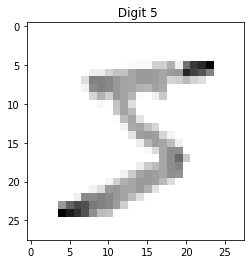

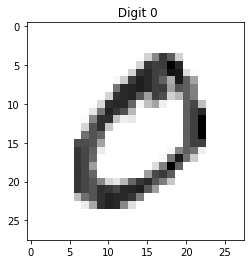

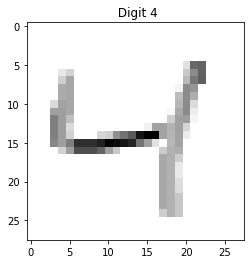

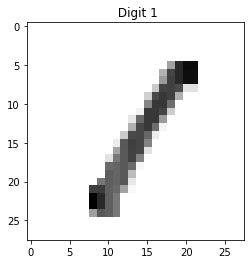

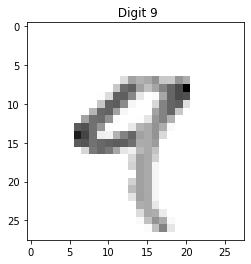

In [4]:
for i in range(0,5):
    plt.imshow(train_images[i], plt.cm.binary) # this is not a color image so we use colormap to change it to black and white
    plt.title(" Digit " + str(train_labels[i]))
    plt.show()
    

## Below is an array of the actual data we want to pass through our neural network.

Below, the 0's in the array repersent the blank space in the image and the numbers ranging from 0.01-0.99 represent the pencil stroke of the digit.

Before normalisation these numbers would have ranged between 0-255.

In [5]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Prepare the data further
Keras expects the training targets to be 10-dimensional vectors, since there are 10 nodes in our output layer, but we’re currently giving a single integer representing the class for each image.

Conveniently there is a utility method that fixes this issue: 'to_categorical'. It turns our array of class integers into an array of one-hot vectors instead. For example, 2 would become [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [7]:
# Flatten the images
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

# convert the labels to one hot encoded vectors.
vector_train_labels = kr.utils.to_categorical(train_labels, 10)
vector_test_labels = kr.utils.to_categorical(test_labels, 10)

# Confirm our data is shaped correctly for how we want to design our model
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


# Building the Model

A sequential model is a linear stack of layers, they are basically placed in a sequence one after the other. We make our input layer flatten the data being passed to it. This is neccesary because our images are 28x28 multi-dimensional arrays, our model however, expects a one dimensional array. Flatten basically puts everything in one column and inreases the number of rows.

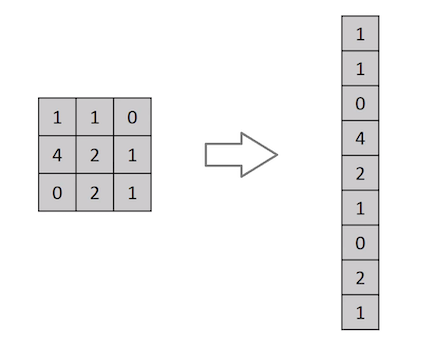

## Layers

Our next two layers are dense layers. A dense layer is just a regular layer of neurons in a neural network. Each neuron recieves input from all the other neurons in the previous layer, thus densely connected. We pass them two parameters; how many neurons in the layer and the activasion function.

Our final layer has 10 neurons because our input data ranges from 0-9. Our activation function is softmax for probability distribution.

In [8]:
model = kr.models.Sequential() # Create a new sequential neural network
#model.add(kr.layers.Flatten()) # Input layer
model.add(kr.layers.Dense(128, input_dim=784, activation="relu")) # 128 neurons and the 'basic' activation function.
model.add(kr.layers.Dense(128, activation="relu"))
model.add(kr.layers.Dense(10, activation="softmax"))

# Tried a different model but problem doesnt change
#model = kr.models.Sequential() # Create a new sequential neural network
#model.add(kr.layers.Dense(600, input_dim=784, activation="relu")) 
#model.add(kr.layers.Dense(400, activation="relu"))
#model.add(kr.layers.Dense(10, activation="softmax"))

# Compiling and train our model
Here we pass 3 parameters; the optimizer to use, the loss metric (the degree of error) and the metrics to track.

To train the model we use the fit function. We pass in what we want trained and the epochs. The epochs is simply how many times we want our neural network to go over the training data set. If we set it to 1, the neural network will get to see the data once.

Batch size is the nmber of samples per gradient update. If unspecified, batch_size will default to 32.

In [9]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # Played around with 'sgd' and 'rmsporp' optimizer also.
model.fit(train_images, vector_train_labels, epochs=3, batch_size=128, verbose=1)

Epoch 1/3
60000/60000 [==============================] - 3s 50us/step - loss: 0.3813 - accuracy: 0.8939
Epoch 2/3
60000/60000 [==============================] - 3s 44us/step - loss: 0.1528 - accuracy: 0.9553
Epoch 3/3
60000/60000 [==============================] - 3s 45us/step - loss: 0.1041 - accuracy: 0.9682


## Calculate validation loss and accuracy
We want our pattern to learn what makes each digit that digit. It's not uncommon for a model to just memorize  the samples we pass it.

Because of this the next thing we should do is calculate the validation loss and accuracy using the test sets. We should expect the accuracy to be lower here as the model hasn't seen this set before. To do this we use the evaluate function.

In [10]:
loss, accuracy = model.evaluate(test_images, vector_test_labels)
print(loss, accuracy)

10000/10000 [==============================] - 1s 54us/step
0.11171326128467918 0.9666000008583069


## Make a prediction
Now we can confirm the model is working by having it make a prediction. We can have it make a random prediction by setting a random number using the random module. The title of the image is a one hot vector. This shows the test label as an index.
[0,0,0,1,0,0,0,0,0,0] This would equal to 3.

<class 'numpy.ndarray'>
(10000, 784)
9


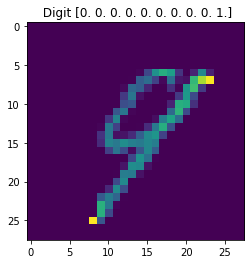

In [14]:
import random
i = random.randint(1, 101)
print(type(test_images))
print(test_images.shape)

predictions = model.predict([test_images])    
np.argmax(predictions[i])

plt.imshow(test_images.reshape(10000, 28, 28)[i])
plt.title(" Digit " + str(vector_test_labels[i]))
print(test_labels[i])
plt.show()

# A summary of the model
We can output a summary of the model we have built with the summary function. This function gives us the layers in our model and their shape as well as parameters


In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# Save the model
We should now save the model for use locally in our flask web server.

In [102]:
#model.save_weights('model.h5')
model.save('model.h5')